In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load data
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MediHouseVal'] = housing.target

X = data[['MedInc']]  # Feature: Median Income
y = data['MediHouseVal']  # Target: Median House Value

In [5]:
# --- Task 2: Preprocess the Data ---
# split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardise the feature (for SGD, but not for BGD to keep coefficients interpretable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# --- Task 3: Build Linear Regression Models ---
# model 1: Batch Gradient Descent
bgd_model = LinearRegression()
bgd_model.fit(X_train, y_train)

# model 2: Stochastic Gradient Descent
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, learning_rate='constant', eta0=0.01)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='constant', random_state=42)

In [8]:
# --- Task 4: Make Predictions ---
# predict on test set
y_pred_bgd = bgd_model.predict(X_test)
y_pred_sgd = sgd_model.predict(X_test_scaled)

In [9]:
# predict for MedInc = 8.0 ($80,000)
medinc_8 = np.array([[8.0]])
medinc_8_scaled = scaler.transform(medinc_8)
pred_bgd_8 = bgd_model.predict(medinc_8)
pred_sgd_8 = sgd_model.predict(medinc_8_scaled)
print(f"BGD Prediction for MedInc=8.0: {pred_bgd_8[0]:.2f} ($100,000s)")
print(f"SGD Prediction for MedInc=8.0: {pred_sgd_8[0]:.2f} ($100,000s)")

BGD Prediction for MedInc=8.0: 3.80 ($100,000s)
SGD Prediction for MedInc=8.0: 3.68 ($100,000s)


/Users/oliver/School/24-25/IN3200/report/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Users/oliver/School/24-25/IN3200/report/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# evaluate models
print("\nModel Performance on Test Set:")
print(f"BGD - R²: {r2_score(y_test, y_pred_bgd):.3f}, MSE: {mean_squared_error(y_test, y_pred_bgd):.3f}")
print(f"SGD - R²: {r2_score(y_test, y_pred_sgd):.3f}, MSE: {mean_squared_error(y_test, y_pred_sgd):.3f}")


Model Performance on Test Set:
BGD - R²: 0.459, MSE: 0.709
SGD - R²: 0.458, MSE: 0.711


/Users/oliver/School/24-25/IN3200/report/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/oliver/School/24-25/IN3200/report/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


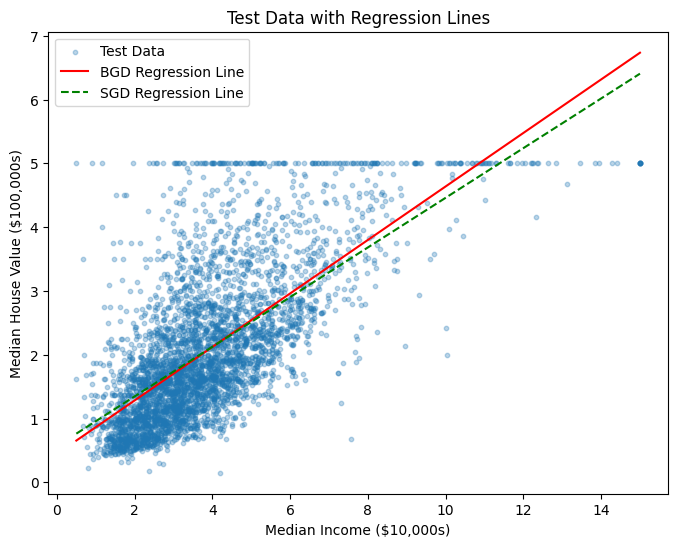

In [12]:
# --- Task 6: Visualize the Results ---
# scatter plot of test data with regression lines
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.3, s=10, label='Test Data')

# BGD regression line
x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_range_bgd = bgd_model.predict(x_range)
plt.plot(x_range, y_range_bgd, color='red', label='BGD Regression Line')

# SGD regression line
x_range_scaled = scaler.transform(x_range)
y_range_sgd = sgd_model.predict(x_range_scaled)
plt.plot(x_range, y_range_sgd, color='green', linestyle='--', label='SGD Regression Line')
plt.xlabel('Median Income ($10,000s)')
plt.ylabel('Median House Value ($100,000s)')
plt.title('Test Data with Regression Lines')
plt.legend()
plt.savefig('images/regression_lines_test_data.png')
plt.show()